In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r'../../data/tidy/fuel-tickets-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
df_clean = pd.read_csv(r'../../data/tidy/fuel-tickets-clean-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

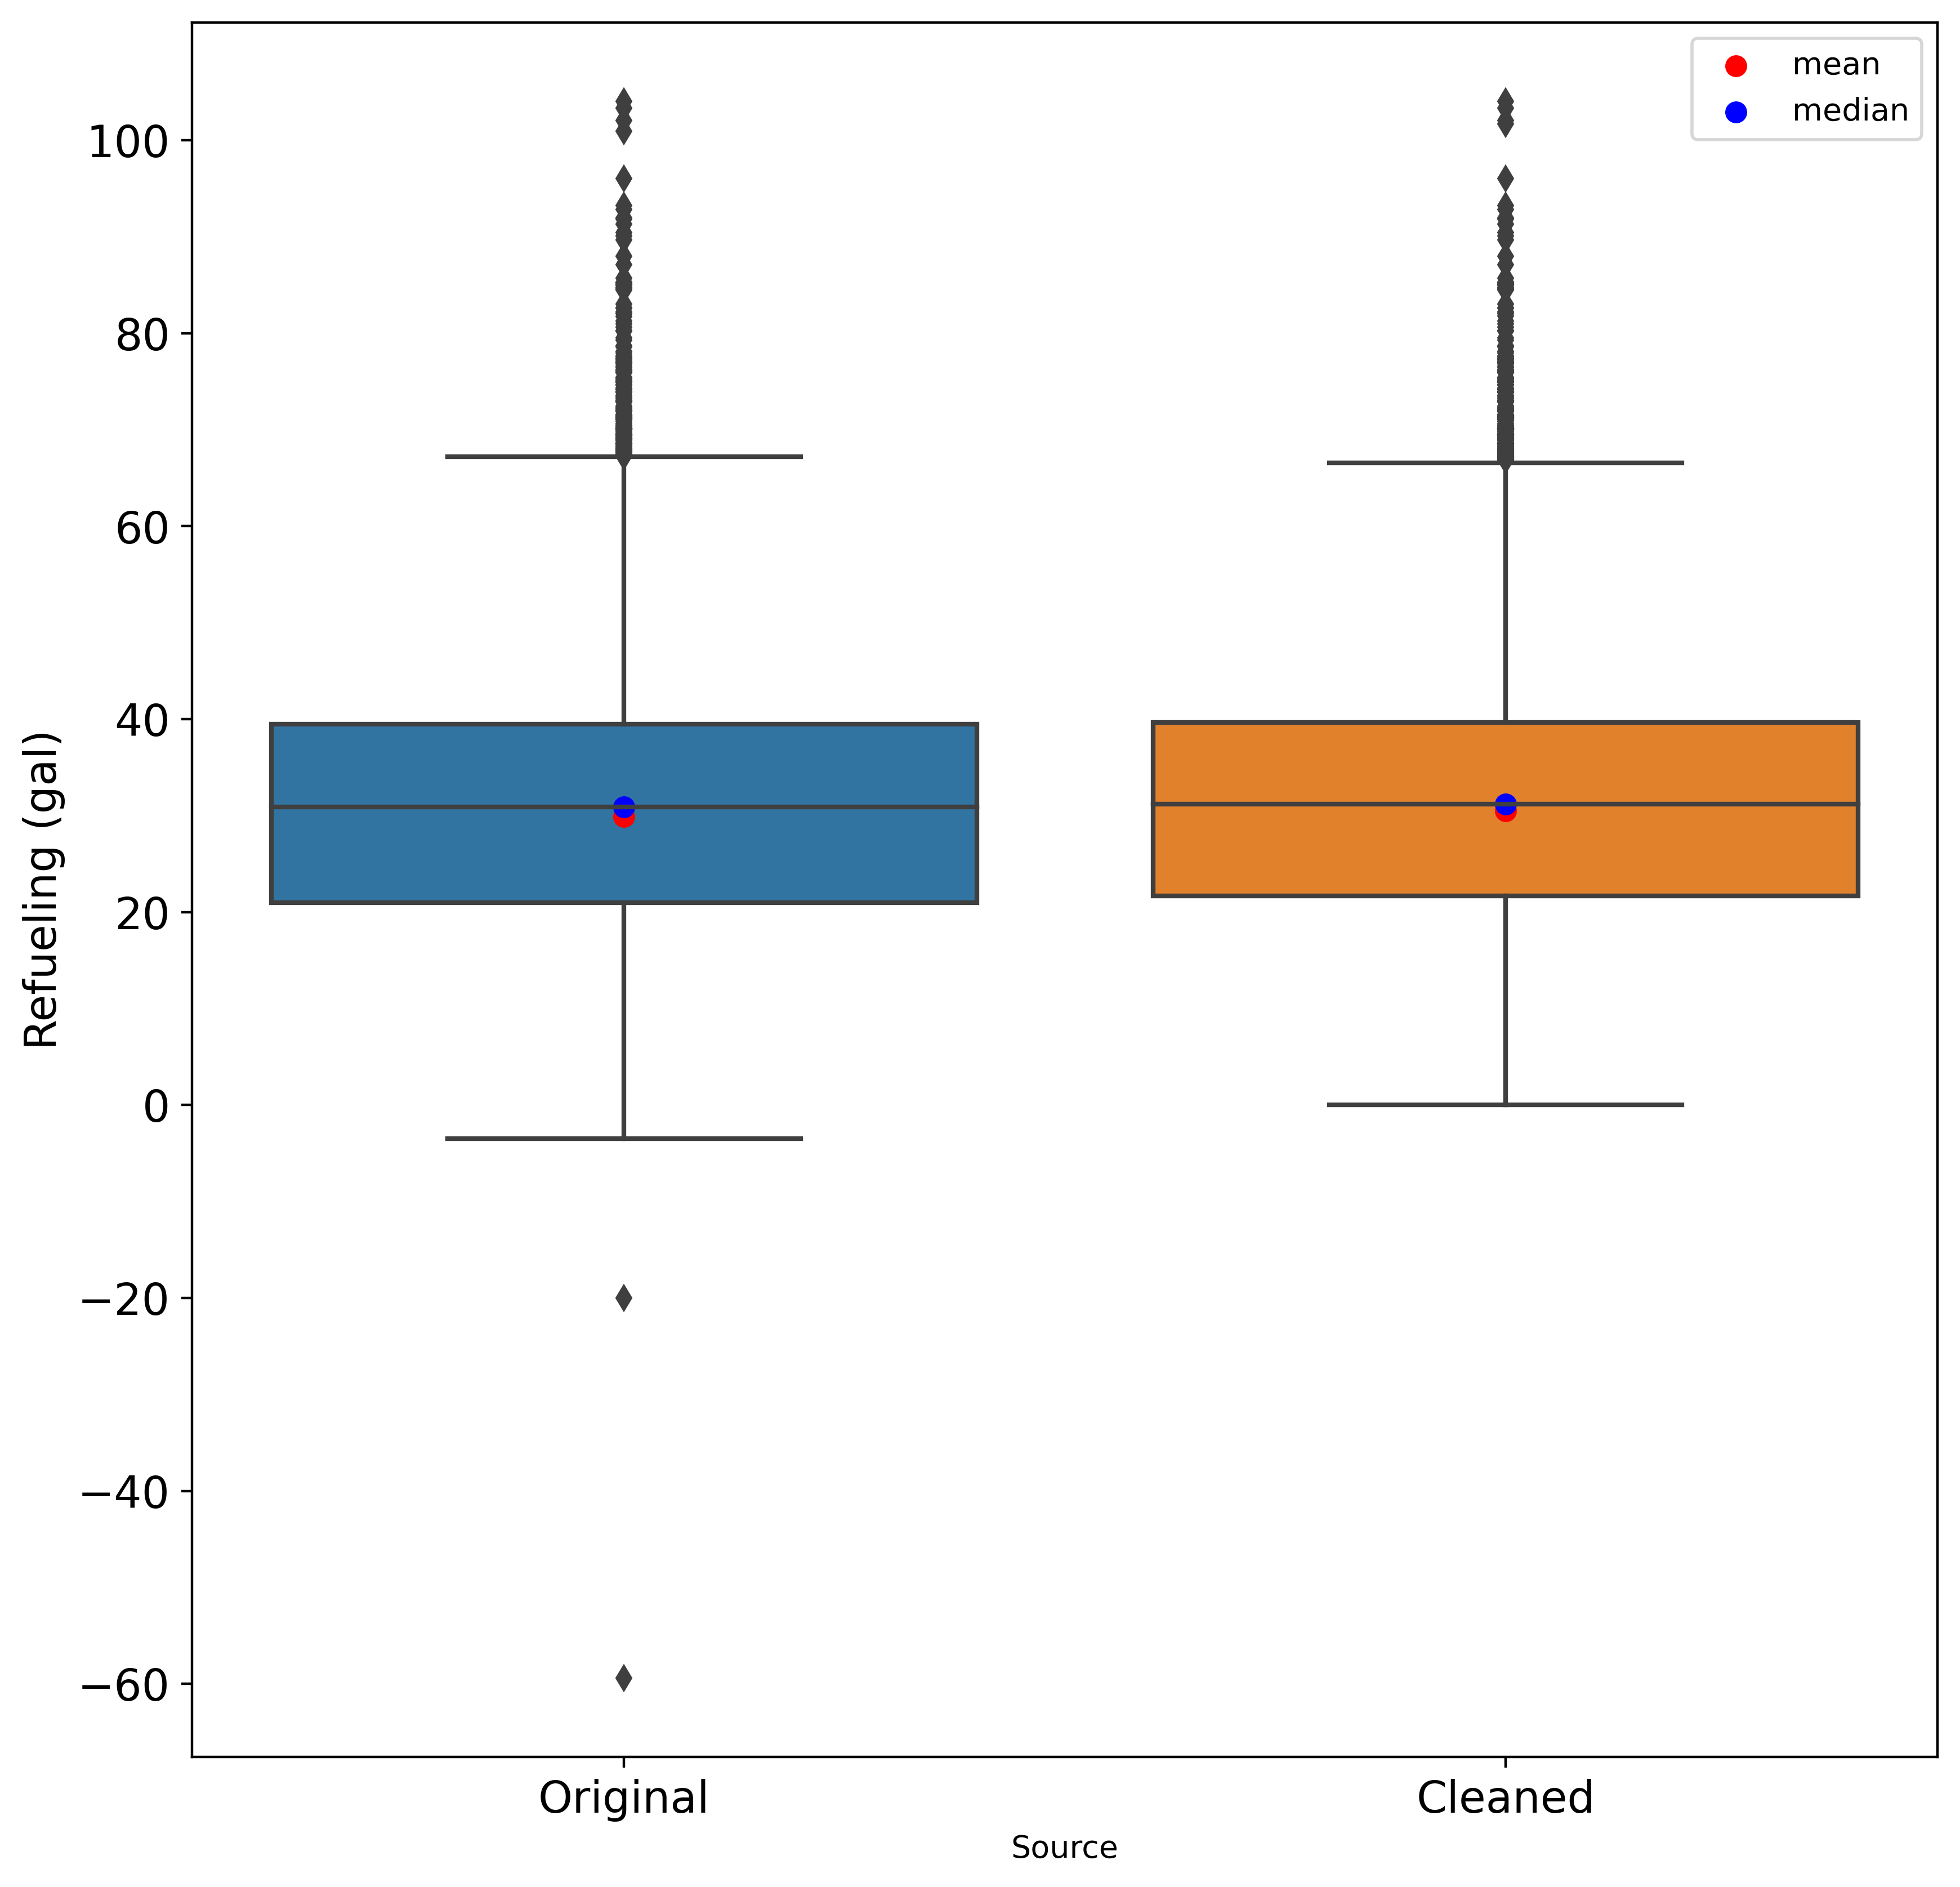

In [16]:

# Combine original and cleaned dataframes and add a column to indicate source
df['Source'] = 'Original'
df_clean['Source'] = 'Cleaned'
df_combined = pd.concat([df, df_clean])

# Calculate mean and median
mean_original = df['Qty'].mean()
mean_cleaned = df_clean['Qty'].mean()
median_original = df['Qty'].median()
median_cleaned = df_clean['Qty'].median()

# Plot data
plt.figure(figsize=(10, 10), dpi=400)
sns.boxplot(x='Source', y='Qty', data=df_combined)

# Add mean and median
plt.scatter(['Original', 'Cleaned'], [mean_original, mean_cleaned], color='red', label='mean')
plt.scatter(['Original', 'Cleaned'], [median_original, median_cleaned], color='blue', label='median')

plt.ylabel('Refueling (gal)', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Refueling')
plt.legend()
plt.show()


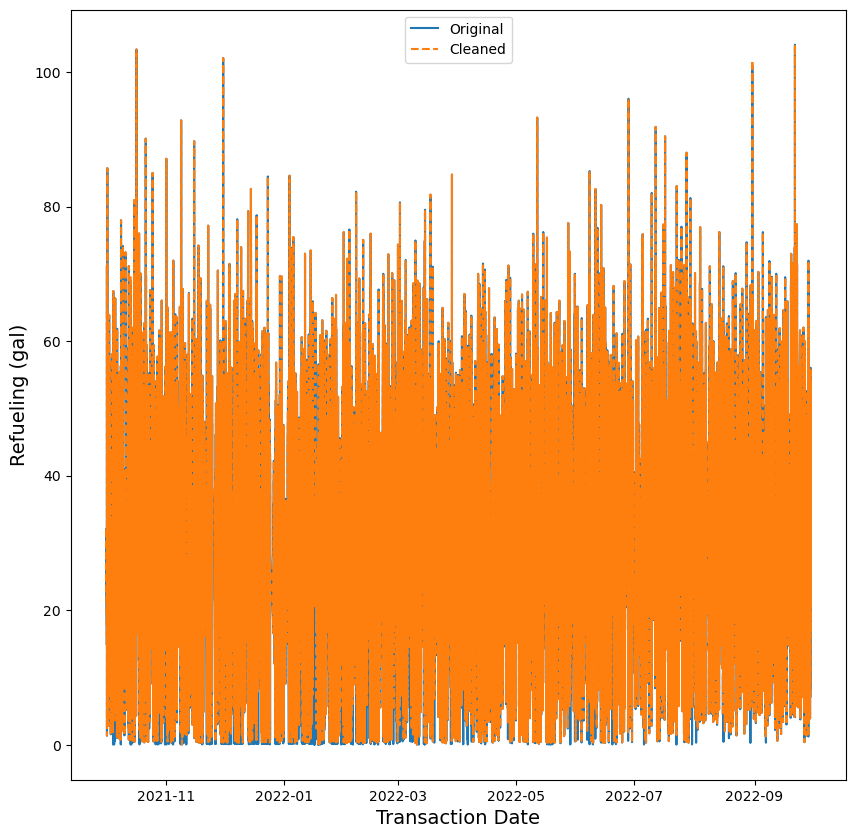

In [17]:
# Ensure that 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = df.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = df_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Plot data
plt.figure(figsize=(10, 10))
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original')
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--')

plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Refueling (gal)', fontsize=14)
plt.legend()
plt.show()


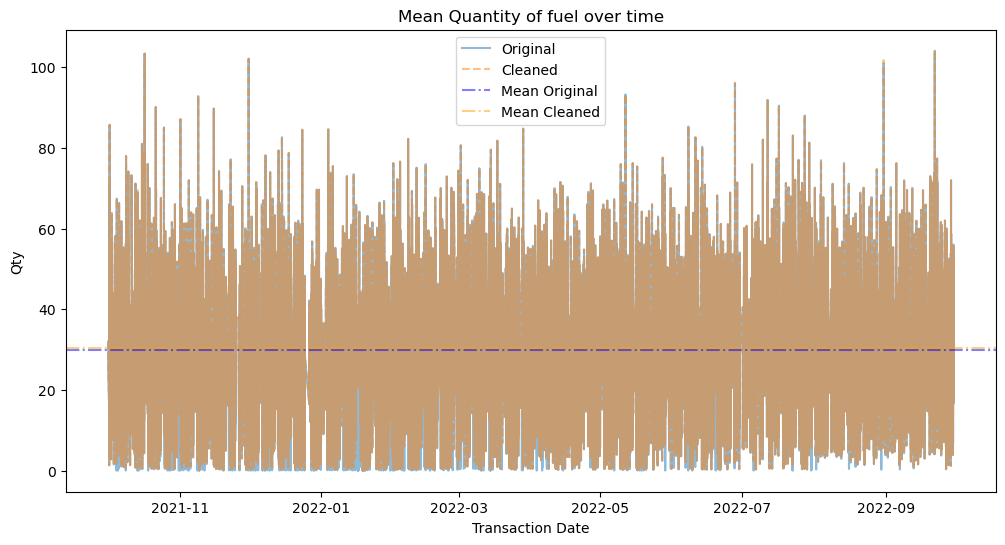

In [10]:
import matplotlib.pyplot as plt

# Ensure that 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Group data by Transaction Date and take the mean of the Quantity
df_grouped = df.groupby('Transaction Date')['Qty'].mean().reset_index()
df_clean_grouped = df_clean.groupby('Transaction Date')['Qty'].mean().reset_index()

# Calculate mean of Qty in both dataframes
mean_df = df['Qty'].mean()
mean_df_clean = df_clean['Qty'].mean()

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Transaction Date'], df_grouped['Qty'], label='Original', alpha=0.5)
plt.plot(df_clean_grouped['Transaction Date'], df_clean_grouped['Qty'], label='Cleaned', linestyle='--', alpha=0.5)

# Add mean lines
plt.axhline(mean_df, color='blue', linestyle='-.', label='Mean Original', alpha=0.5)
plt.axhline(mean_df_clean, color='orange', linestyle='-.', label='Mean Cleaned', alpha=0.5)

plt.title('Mean Quantity of fuel over time')
plt.xlabel('Transaction Date')
plt.ylabel('Qty')
plt.legend()
plt.show()
